# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 15 september 2022

## Importeer libraries

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [6]:
train_images_normalized = train_images.astype('float32')/255

In [7]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [8]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_images_normalized = test_images.astype('float32')/255

In [11]:
test_images_enhanced  = test_images_normalized.reshape(10000, 28, 28, 1)

In [12]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [15]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden ("Dense") laag toe

In [17]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

cnn.add(Conv2D(filters=64, kernel_size=(4, 4), activation='sigmoid'))
cnn.add(AveragePooling2D())

cnn.add(Flatten())
cnn.add(Dropout(0.5))

cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [19]:
from keras.callbacks import ModelCheckpoint 
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')
file_path = "weights{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [23]:
import time

# noteer de huidige tijd voor het uitvoeren van de code
start_time = time.time()

history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 14, # varieer het aantal epochs
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded),
        callbacks = [checkpoint])

# noteer de huidige tijd na het uitvoeren van de code
end_time = time.time()

# bereken de totale uitvoeringstijd
total_time = end_time - start_time

# print de totale uitvoeringstijd
print("De totale uitvoeringstijd van trainen was:", total_time, "seconden.")

Epoch 1/14
469/469 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9790
Epoch 1: val_accuracy improved from 0.98550 to 0.98710, saving model to weights01.hdf5
469/469 [==============================] - 17s 35ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 2/14
469/469 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9798
Epoch 2: val_accuracy did not improve from 0.98710
469/469 [==============================] - 18s 38ms/step - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0390 - val_accuracy: 0.9867
Epoch 3/14
468/469 [============================>.] - ETA: 0s - loss: 0.0626 - accuracy: 0.9805
Epoch 3: val_accuracy improved from 0.98710 to 0.98730, saving model to weights03.hdf5
469/469 [==============================] - 18s 38ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0384 - val_accuracy: 0.9873
Epoch 4/14
469/469 [==============================] - ETA: 0s - loss: 0.0625 - accuracy:

**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [21]:
import time

start_time = time.time()

loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
end_time = time.time()

total_time = end_time - start_time

print(f"De nauwkeurigheid was: {acc}")
print("De totale uitvoeringstijd van testen was:", total_time, "seconden.")

313/313 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9855
De nauwkeurigheid was: 0.9854999780654907
De totale uitvoeringstijd van testen was: 1.153001308441162 seconden.


**OPDRACHT**: voeg labels aan deze grafiek toe

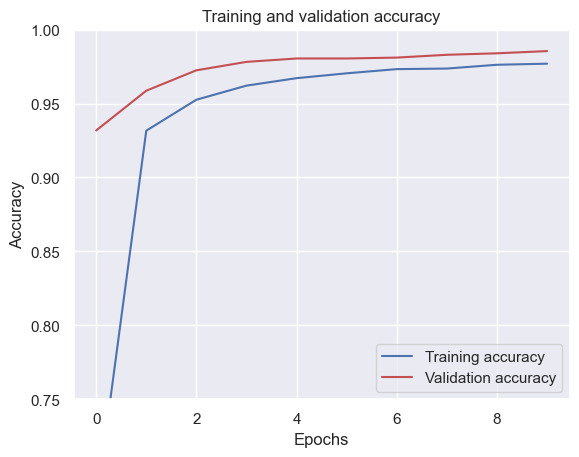

In [22]:
plt.plot(history_cnn.history['accuracy'], label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'],'r', label='Validation accuracy')
plt.ylim(0.75,1.0)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid? 
    - Ik zelf vind dat de nauwkeurigheid best wel goed is, namelijk 97.50%.
* is het netwerk onder- of over-trained?
    - Het netwerk is ondergetrained, dat kunnen we zien aan de grafiek dat het netwerk niet genoeg heeft geleerd van de trainingsgegevens.
* laat een paar fouten zien
    - Dat is hieronder gedaan
 * wat kun je zeggen over de aard van de fouten?
     - Dat de cijfers echt verwarend zijn, zelfs voor mij.
* wat is sneller: het trainen of het testen?
    - Aan de hand van de timer die terug te zien is in dit bestand, zien we dat het testen veel snelle is. Het duurde namelijk maar 1.1 sec.
* wat kun je nog doen om de nauwkeurigheid te verhogen?
    - Meerdere lagen toevoegen, het activiatiefuncties varieren, de epochs, batch_sizes enz....
(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)
    - Ik had eerst vergeten om een tweede averagepool toe te voegen, de resultaten waren echt te laag. 
    - Ik heb activiatiefuncties gevarieerd.
    - Ik heb ModelCheckpoint toegevoegd waardoor de nauwkeurigheid omhoog is gegaan

In [38]:
y_predicted_labels = cnn.predict(test_images_enhanced)
mistakes = test_labels != np.argmax(y_predicted_labels, axis=1)
num_mistakes = np.count_nonzero(mistakes)

print(f"Number of mistakes: {num_mistakes}")

313/313 [==============================] - 1s 3ms/step
Number of mistakes: 121


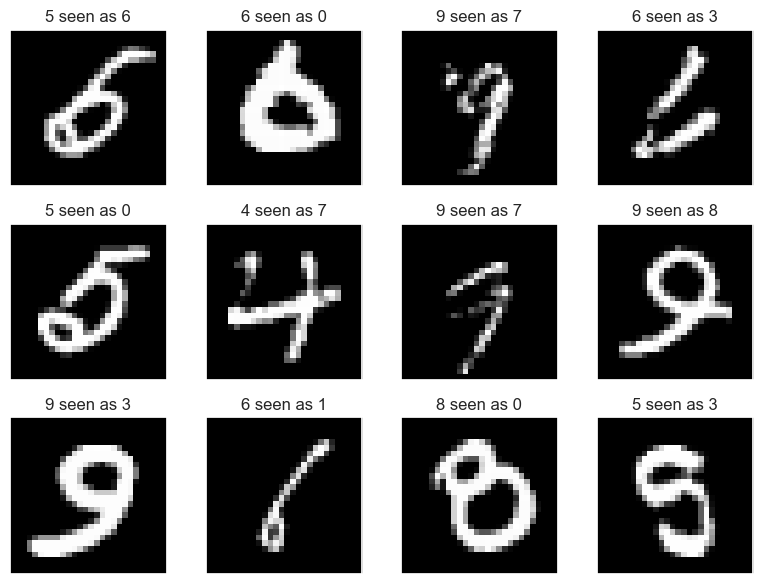

In [39]:
# plot de eerste 12 fouten
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8, 6))

for i, axi in enumerate(ax.flat):
    while True:
        j = np.random.randint(len(test_images_enhanced))
        if mistakes[j]:
            axi.imshow(test_images_enhanced[j], cmap='gray')
            axi.set_title('{0} seen as {1}'.format(test_labels[j], np.argmax(y_predicted_labels[j])))
            axi.set_xticks([])
            axi.set_yticks([])
            break

plt.tight_layout()
plt.show()

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?




* Het resultaat van de Convolutional Neural Network (CNN) was hoger (0.9855) dan het resultaat van de K-Nearest Neighbors (KNN) classifier (0.9691) en van de Neurale Netwerk (NN) classifier (0.980) . Dit suggereert dat de CNN beter presteert dan de KNN & NN classifier op de gegeven dataset.

* KNN kan fouten maken als gevolg van de nabijheid van handgeschreven cijfers die op elkaar lijken, zoals een 4 en een 9, of een 1 en een 7. Dit kan leiden tot classificatiefouten als de KNN-classifier de verkeerde klasse kiest vanwege de nabijheid van datapunten.

* CNN kan fouten maken als het model onvoldoende variatie in de trainingsgegevens heeft waardoor het moeilijk wordt om nieuwe, ongeziene voorbeelden correct te classificeren.

* NN kan fouten maken wanneer er een sprake is van verkeerde classificatie, onevenwichtige trainingsset, onderfitting en overfitting.